In [1]:
# 1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.
# 2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, confusion_matrix
from math import sqrt

In [21]:
data = pd.read_csv(r"Dataset\IRIS.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [25]:
x = data.iloc[:, :-1].values
y = data.iloc[:, - 1].values

In [26]:
scalar = MinMaxScaler()
x = scalar.fit_transform(x)

In [27]:
encode = LabelEncoder()
y = encode.fit_transform(y)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [29]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [30]:
y_pred = model.predict(x_test)

<Axes: >

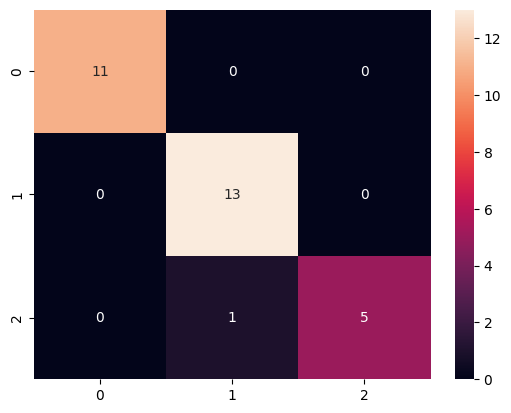

In [31]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [33]:
print("The Accuracy is", accuracy_score(y_test, y_pred))
print("The Precision is", precision_score(y_test, y_pred, average = 'weighted'))
print("The Recall is", recall_score(y_test, y_pred, average = 'weighted'))

The Accuracy is 0.9666666666666667
The Precision is 0.9690476190476189
The Recall is 0.9666666666666667


In [34]:
print("Mean_Squared_Error is", mean_squared_error(y_test, y_pred))
print("Root_Mean_Squared_Error is", sqrt(mean_squared_error(y_test, y_pred)))

Mean_Squared_Error is 0.03333333333333333
Root_Mean_Squared_Error is 0.18257418583505536
